# Figure 1b. Number of detectable and mappable xQTL loci in single−context fine−mapping
The x axis represents the number of detectable or mappable xQTL loci, the y axis represents the context

## detectable xQTL loci in single-context fine-mapping

In [8]:
library(data.table)
library(dplyr)
library(ggplot2)
single_context_detectable_events_summary <- readRDS("~/project/Figure_codes/data/Figure_1b_ii_1.rds")
### define category color"
color_palette <- c("1" = "#3578A3", "2" = "#4B8F78", "3" = "#EA5E2C", "4" = "#CDBA2E", "5" = "#E69933", "6" = "#592357")

In [3]:
head(top_loci_meta_file)

#chr,start,end,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource,pip_sum,event_ID_n_detectable,event_ID_detectable_variant_count,event_ID_n_mappable
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,903284,903285,C,T,chr1:903285:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903351,903352,A,G,chr1:903352:G:A,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903509,903510,G,A,chr1:903510:A:G,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903535,903536,T,A,chr1:903536:A:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904080,904081,C,T,chr1:904081:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904114,904115,T,G,chr1:904115:G:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0


In [39]:
#color_palette <- brewer.pal(6, "Set2")

# First: calculate total counts per resource
total_counts <-  single_context_detectable_events_summary%>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_detectable_events_summary$resource <- factor(single_context_detectable_events_summary$resource, levels = rev(levels(ordered_resources)))

#pdf("single_context_stacked_plot_detectable.pdf", width =10, height = 10)
# Create stacked bar plot
p1 <- ggplot(single_context_detectable_events_summary, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

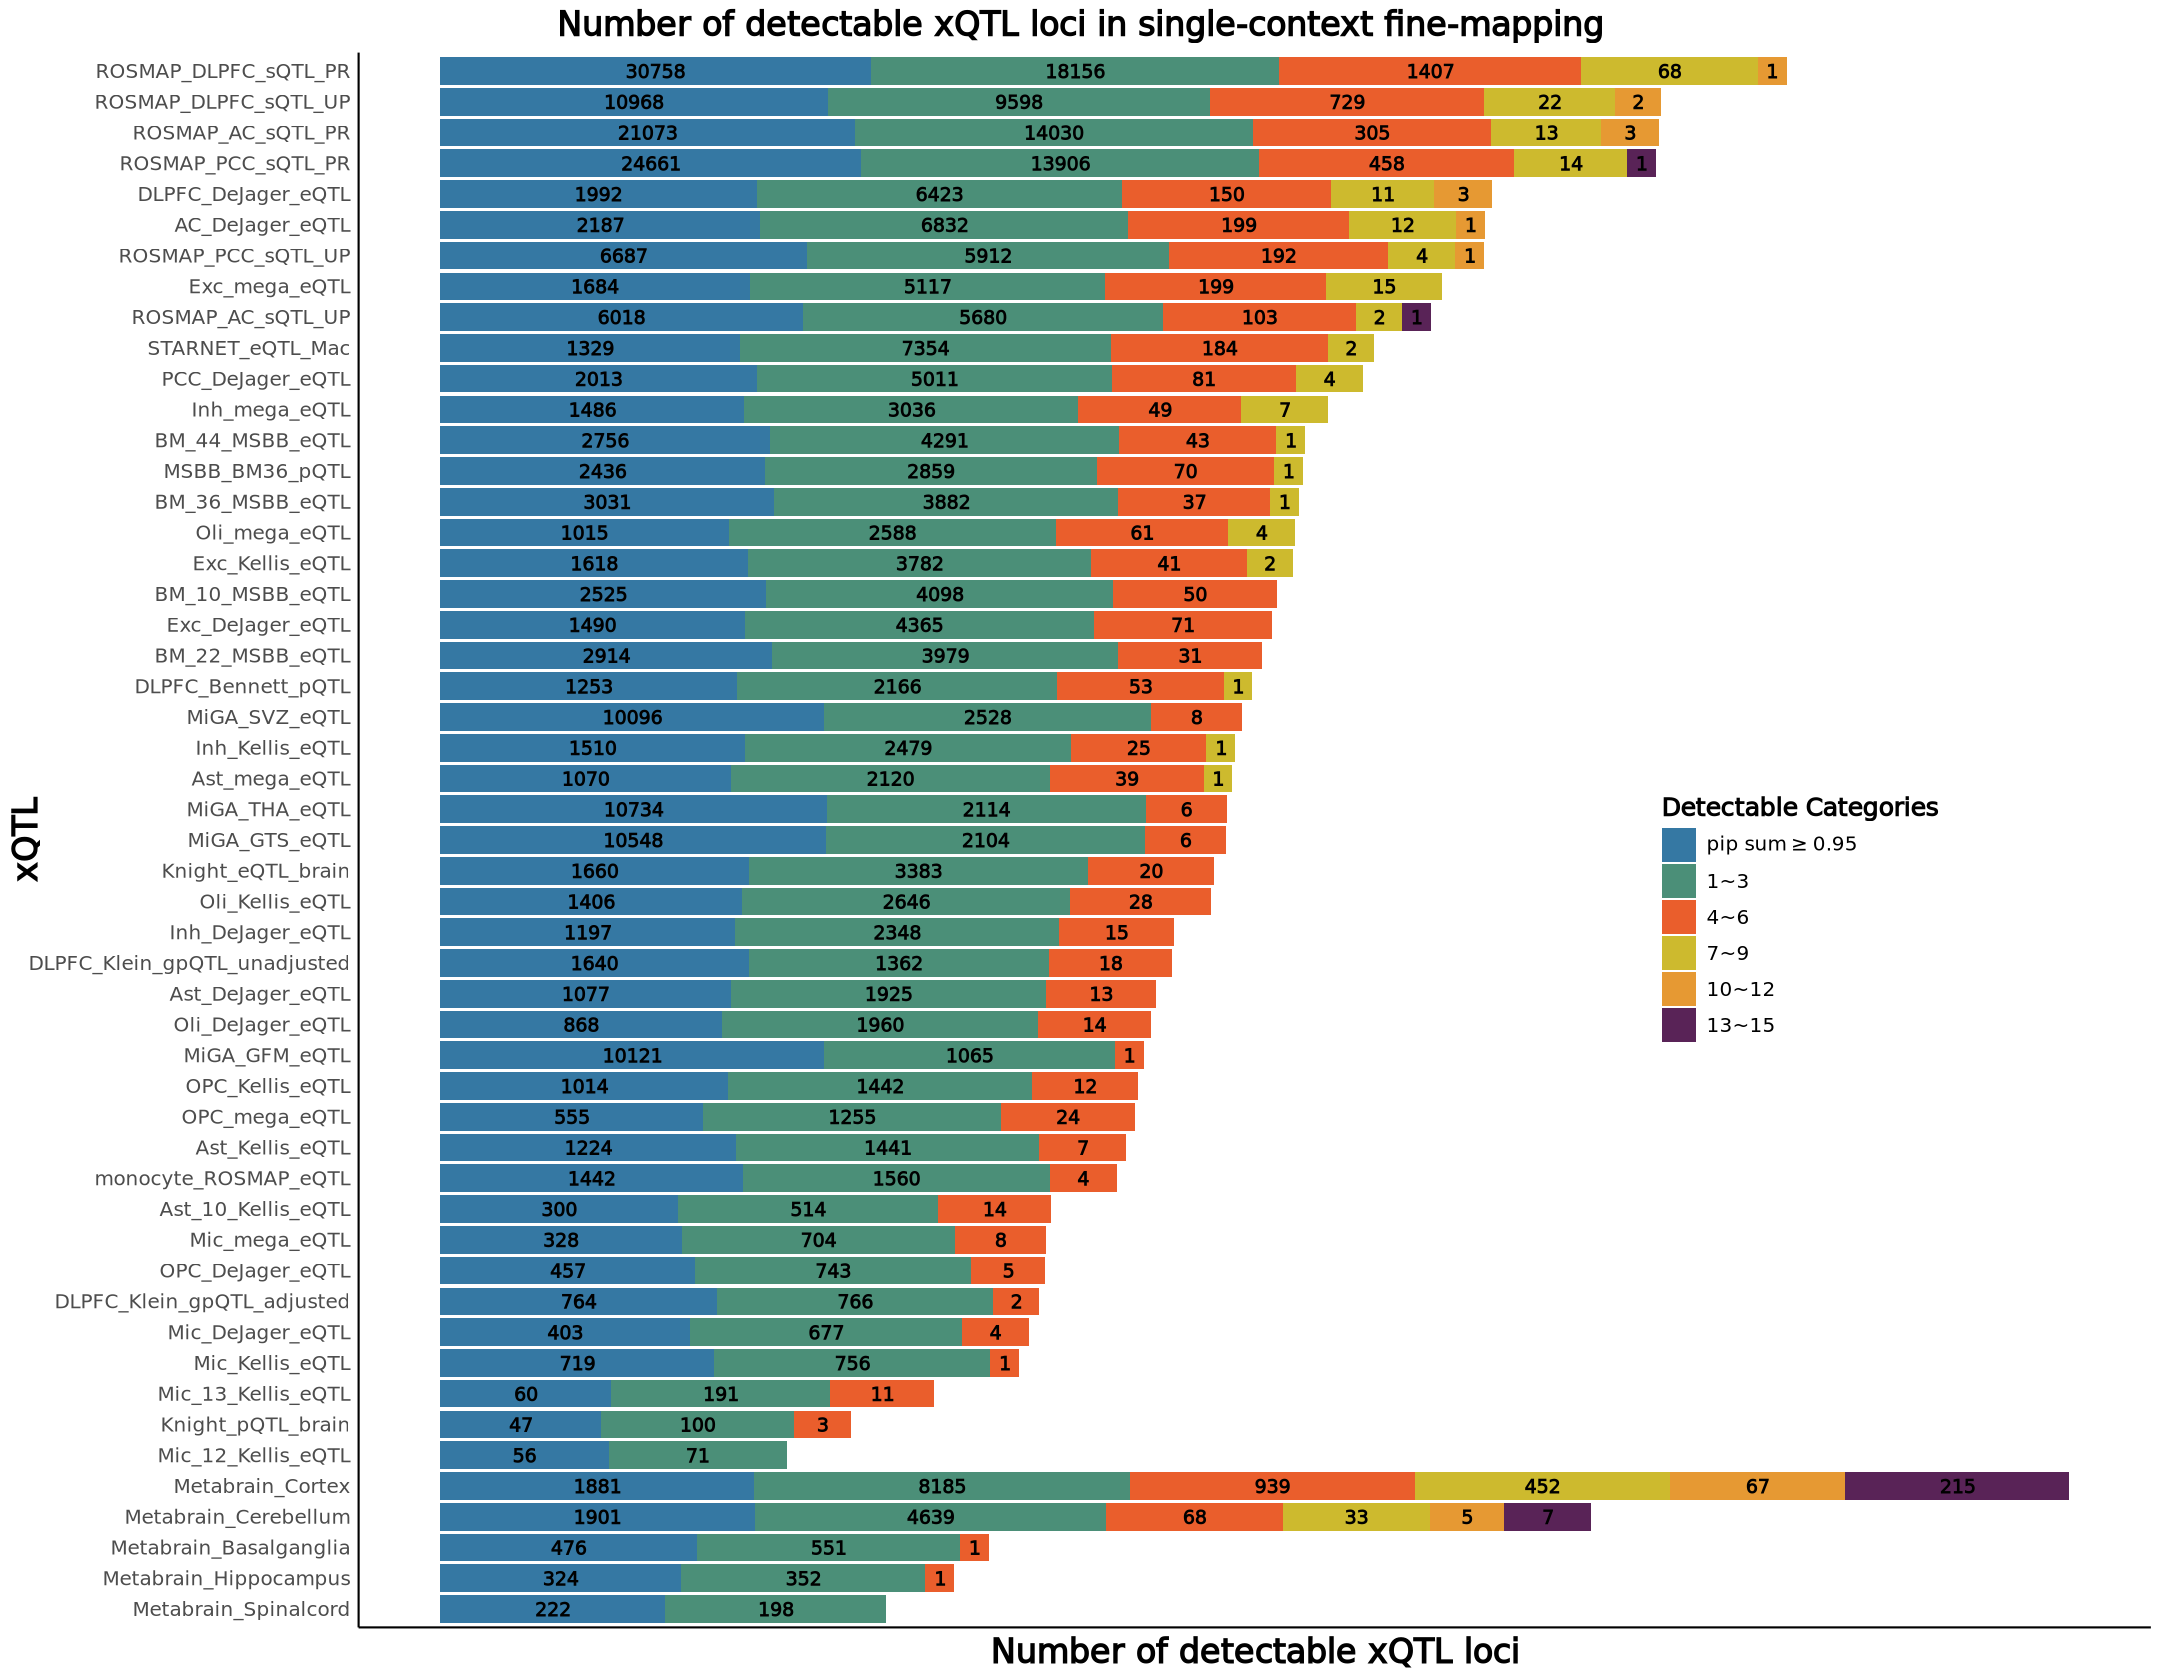

In [43]:
options(repr.plot.width = 18, repr.plot.height = 14)
p1

## mappable xQTL loci in single-context fine-mapping

In [37]:
single_context_mappable_events_summary <- readRDS("~/project/Figure_codes/data/Figure_1b_ii_2.rds")
# First: calculate total counts per resource
total_counts <- single_context_mappable_events_summary %>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_mappable_events_summary$resource <- factor(single_context_mappable_events_summary$resource, levels = rev(levels(ordered_resources)))
#pdf("single_context_stacked_plot_mappable.pdf", width =10, height = 10)
# Create stacked bar plot
p2<- ggplot(single_context_mappable_events_summary, aes(x = resource, y = log_gene_count, fill = n_mappable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
 geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of mappable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of mappable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

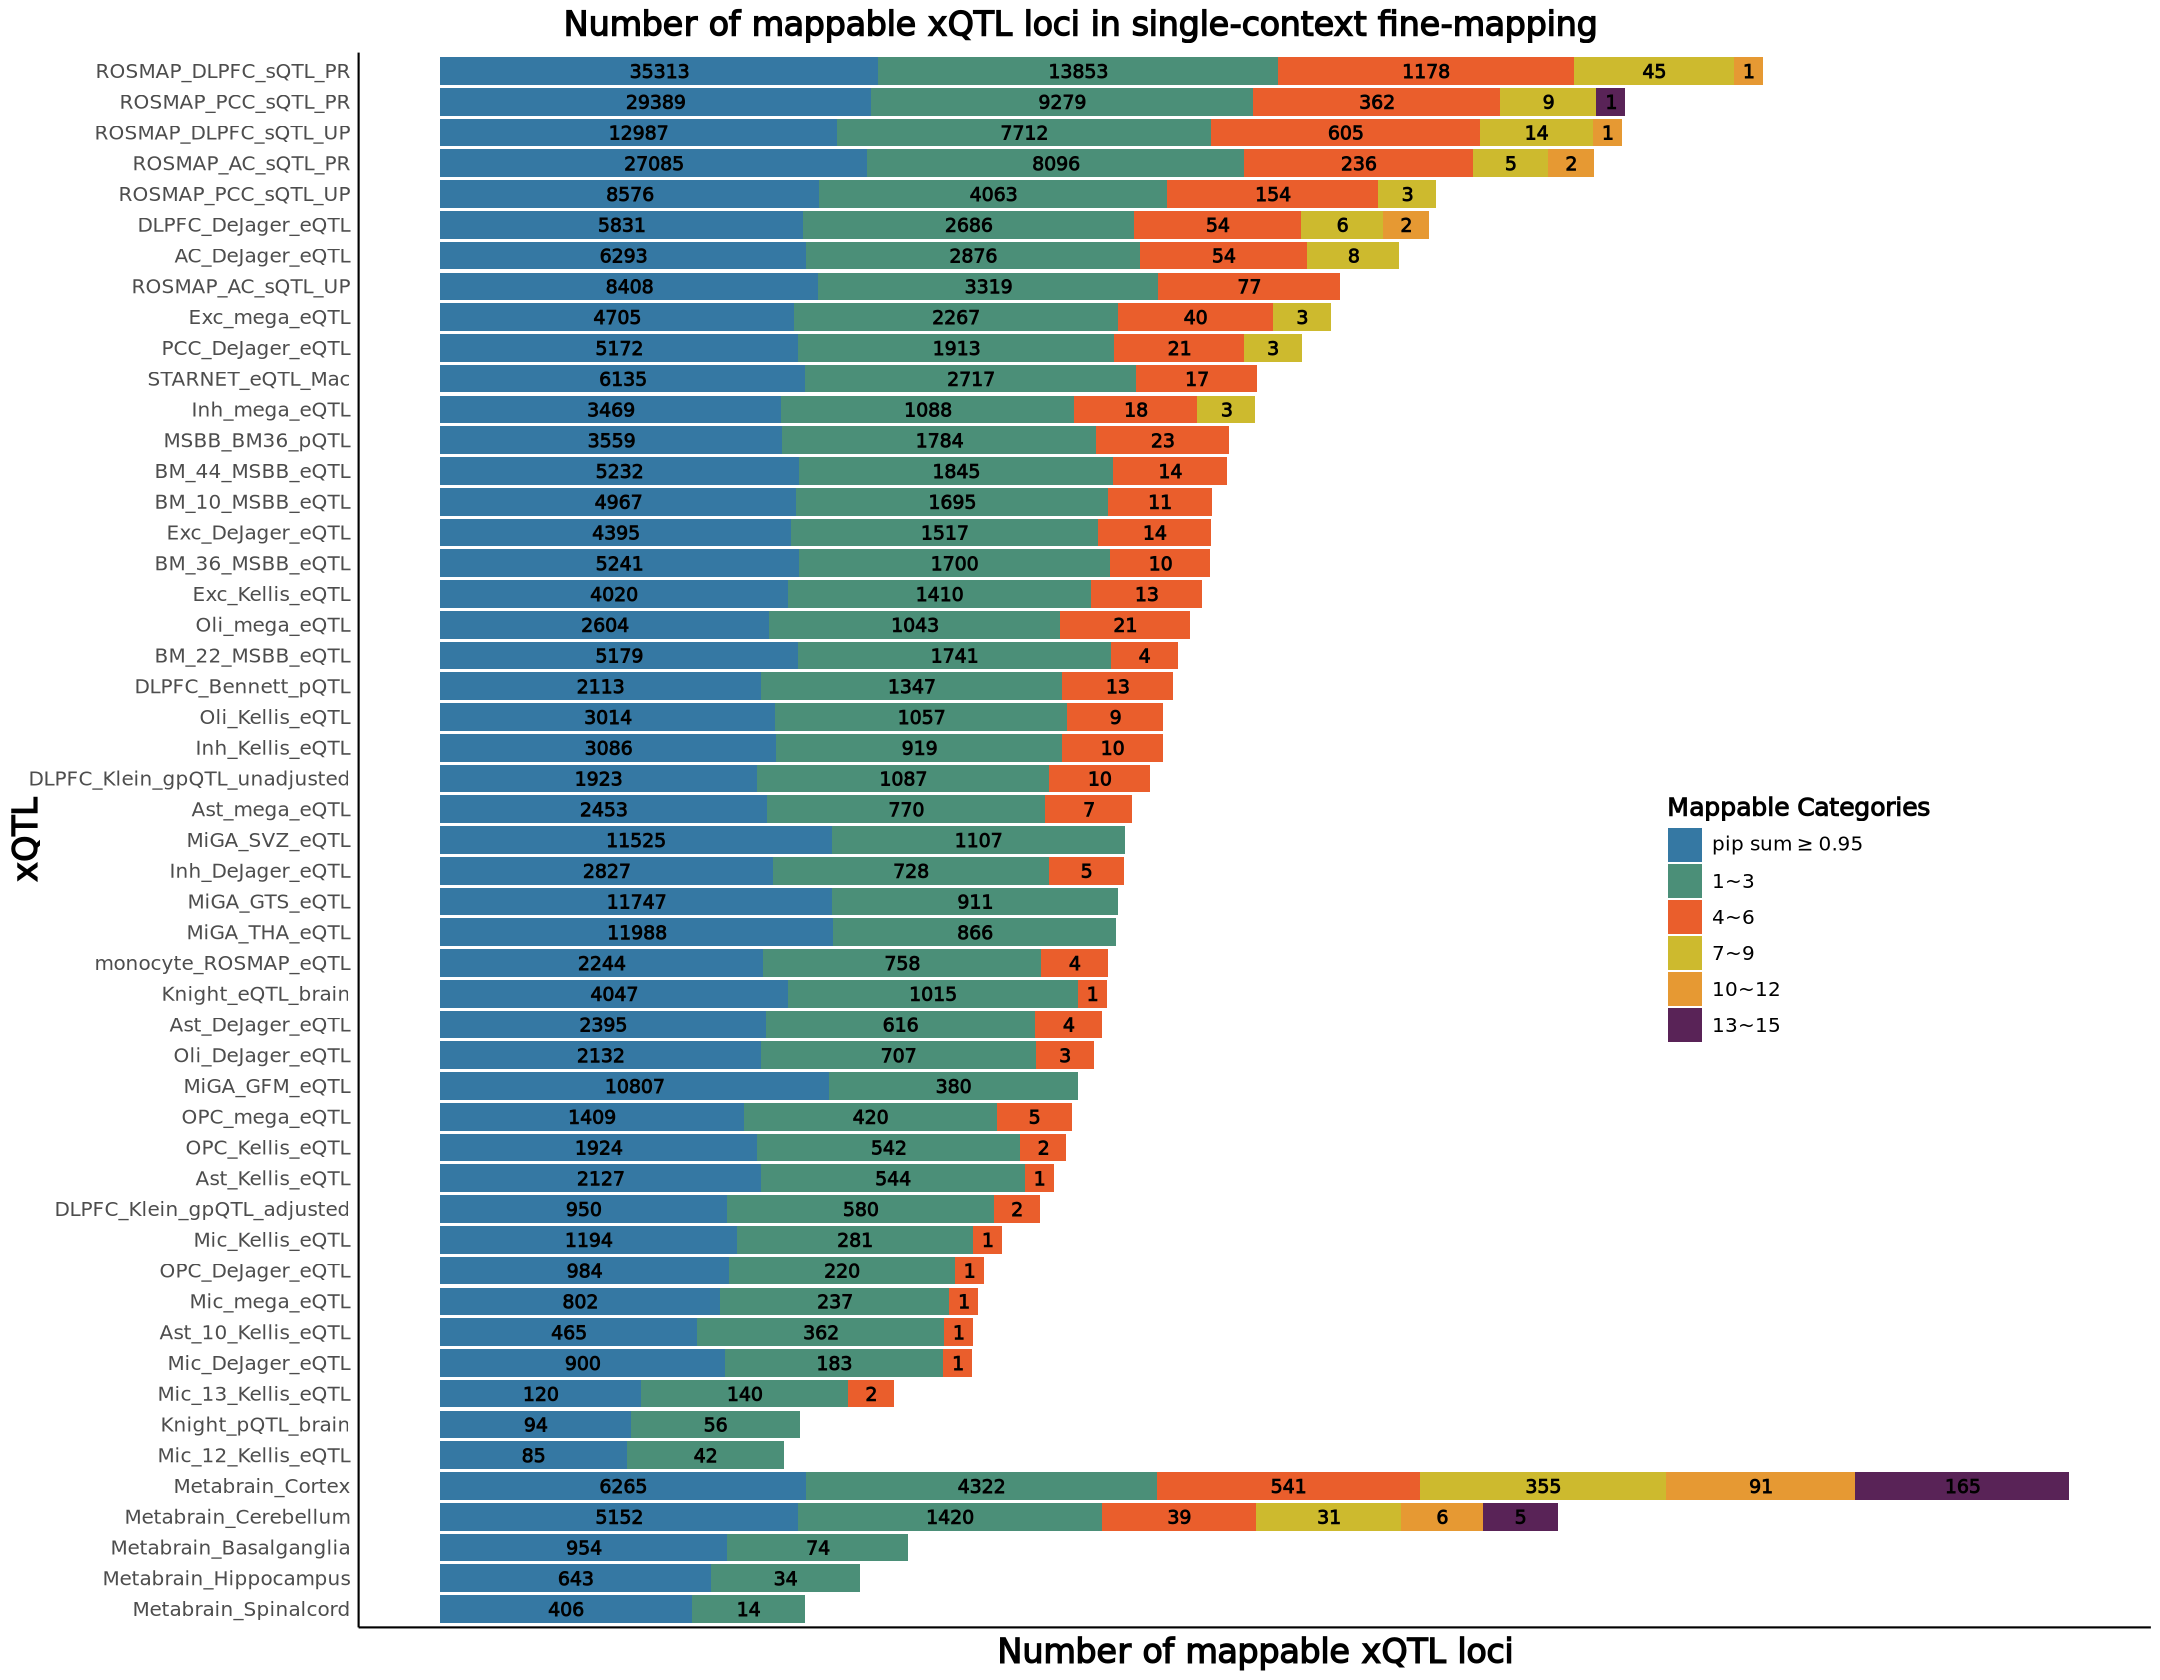

In [42]:
options(repr.plot.width = 18, repr.plot.height = 14)
p2